In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import poliastro 
import plotly

In [3]:
from poliastro.bodies import Earth

In [4]:
from poliastro.twobody import Orbit

In [5]:
from astropy import units as u

In [6]:
pos_km = np.array([8449.401305, 9125.794363, -17.461357])

In [7]:
vel_kms = np.array([-1.419072, 6.780149, 0.002865])

In [14]:
orb = Orbit.from_vectors(Earth, pos_km * u.km, vel_kms * u.km/u.s) # , epoch="2021-06-26-00:00:00.000-UTC")

In [15]:
orb


7252 x 42214 km x 0.1 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

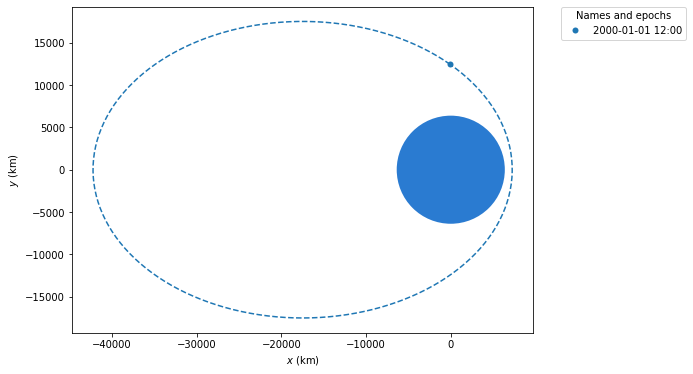

In [11]:
orb.plot()

In [16]:
orb.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [19]:
orb.energy

<Quantity -8.05810623 km2 / s2>

In [20]:
orb.argp

<Quantity 3.9546972 rad>

In [22]:
orb.t_p

<Quantity 1775.83381142 s>

In [23]:
orb.period

<Quantity 38709.99968497 s>

In [25]:
t_transfer = 0.5 * orb.period - orb.t_p
t_transfer

<Quantity 17579.16603107 s>

In [28]:
orb_transfer = orb.propagate(t_transfer)

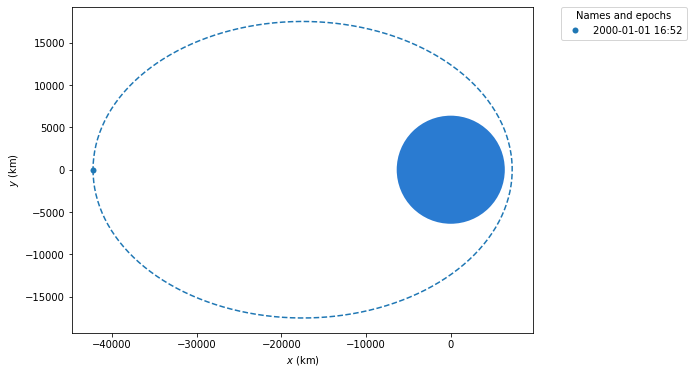

In [29]:
orb_transfer.plot()

In [30]:
orb_transfer.

<Quantity 12376.92550748 km>

In [31]:
orb.p

<Quantity 12376.92550748 km>

In [32]:
from astropy.coordinates import *

In [33]:
orb_transfer.represent_as(CartesianRepresentation)

<CartesianRepresentation (x, y, z) in km
    (-30779.84985356, 28890.15177112, 63.10353834)>

In [39]:
r_mag = np.sqrt(30779.84985356 * 30779.84985356 + 28890.15177112 * 28890.15177112 + 63 * 63)
r_mag

42214.26293761441

In [35]:
35785 + 6371

42156

In [65]:
vel = orb_transfer.represent_as(CartesianRepresentation, CartesianDifferential).differentials['s']
vel

<CartesianDifferential (d_x, d_y, d_z) in km / s
    (-1.13869063, -1.21317726, 0.00235306)>

In [40]:
v_mag = np.sqrt(1.13869063 * 1.13869063 + 1.21317726 * 1.21317726 + 0.00235306 * 0.00235306)
v_mag

1.663857251065207

In [42]:
geo_vel = 2 * np.pi * r_mag  / (24 * 60 * 60)
geo_vel

3.069907831516604

In [43]:
delta_v = geo_vel - v_mag
delta_v

1.4060505804513972

In [45]:
import datetime

In [46]:
date_start = "2021-06-26-19:20:00.000000-UTC"

In [52]:
dstart = datetime.datetime.strptime("2021-06-26-19:20", "%Y-%m-%d-%H:%M")
dstart

datetime.datetime(2021, 6, 26, 19, 20)

In [58]:
t_delta_transfer = datetime.timedelta(seconds=t_transfer.value)

In [60]:
(dstart + t_delta_transfer).strftime("%Y-%m-%d-%H:%M:%S")

'2021-06-27-00:12:59'

In [61]:
(dstart + t_delta_transfer).strftime("%Y-%m-%d-%H:%M:%S-%Z")

'2021-06-27-00:12:59-'

In [70]:
curr_vel = vel.d_xyz.value
curr_vel

array([-1.13869063, -1.21317726,  0.00235306])

In [71]:
desired_vel = geo_vel * curr_vel / np.sqrt(np.dot(curr_vel, curr_vel))
desired_vel

array([-2.10094663, -2.23837854,  0.00434152])

In [72]:
desired_vel - curr_vel

array([-0.962256  , -1.02520128,  0.00198846])